# Locally Weighted Regression
- Read and Normalise the dataset
- Generate W
- No training involved ,directly make predictions using closed form solution!
(X'WX)inv(X'WY) where T is transpose of X
- Find the best value of Tau(BanwidthParameter)[CrossValidation]

## Loading Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dfx=pd.read_csv('weightedX.csv')
dfy=pd.read_csv('weightedY.csv')

In [22]:
X=dfx.values
Y=dfy.values

In [23]:
# Normalising The Data( we dont have to normalise Y)
X=(X-X.mean())/X.std()
#Y=(Y-Y.mean())/Y.std()

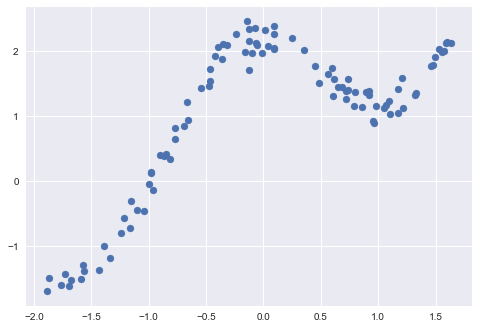

In [24]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

## Find out W(mxm) Diagonal Matrix

we need to convert np array to np.mat
- a*b==>a,b(array)==> Element wise product.
- a*b==>a,b(Matrix)==> Matrix multiplecation.

In [25]:
def getW(queryPoint,X,Tao):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        xi=X[i]
        x=queryPoint
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/-2*Tao*Tao)
    return W

In [26]:
X=np.mat(X)
Y=np.mat(Y)
M=X.shape[0]
W=getW(-1,X,1)
print(W.shape)
print(W)


(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


# Make Predictions

In [27]:
def predict(X,Y,query_x,Tao):
    M=X.shape[0]
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    
    W=getW(qx,X_,Tao)
    # the closed form solution
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred

In [28]:
predict(X,Y,1.0,1.0)

(matrix([[0.14069504],
         [1.45348191]]), matrix([[1.59417694]]))

# Visualise Predictions and Analyse The effect of Tao

In [29]:
def plotPredictions(Tao):
    x_test=np.linspace(-2,2,20)
    y_test=[]
    
    for xq in x_test:
        theta,pred=predict(X,Y,xq,Tao)
        y_test.append(pred[0][0])
    y_test=np.array(y_test)
    X0=np.array(X)
    Y0=np.array(Y)
    plt.style.use('seaborn')
    plt.scatter(X0,Y0)
    plt.scatter(x_test,y_test,c='Red')
    plt.show()

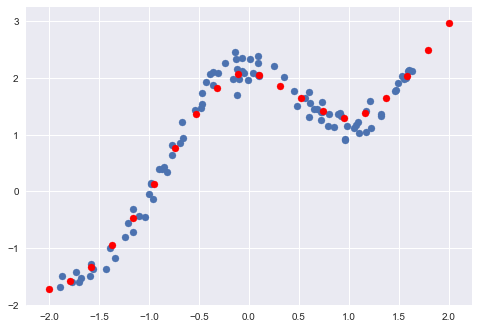

In [32]:
plotPredictions(4)